# Data Analytics Project - Backtesting Model Predictions

# TWL STOCK MODELS EVALUATION

---

# 1. Importing Required Modules

In [1]:
import pandas as pd

# 2. Get required datasets

## 2.1. Get the orders dataset of TWL

In [2]:
orders_df = pd.read_csv('../Preprocess/Pair3/Pair3_orders.csv')
orders_df.head()

,Date,TATAMOTORS_Close,TWL_Close,Spread,zscore,Orders
0,2018-01-08,433.549988,177.449997,256.099991,1.441892,FLAT
1,2018-01-09,437.549988,174.800003,262.749985,1.987008,SHORT
2,2018-01-10,433.299988,171.399994,261.899994,1.917332,SHORT
3,2018-01-11,434.750000,175.149994,259.600006,1.728797,SHORT
4,2018-01-12,437.100006,174.050003,263.050003,2.011601,SHORT


In [3]:
orders_df.tail()

,Date,TATAMOTORS_Close,TWL_Close,Spread,zscore,Orders
55,2018-04-02,339.149994,114.199997,224.949997,-1.111545,FLAT
56,2018-04-03,343.100006,118.349998,224.750008,-1.127938,FLAT
57,2018-04-04,355.600006,114.849998,240.750008,0.183619,GET_OUT_OF_POSITION
58,2018-04-05,362.200012,116.900002,245.300011,0.556593,FLAT
59,2018-04-06,364.100006,119.599998,244.500008,0.491015,FLAT


## 2.2. Visualize the orders

Text(0, 0.5, 'zscore')

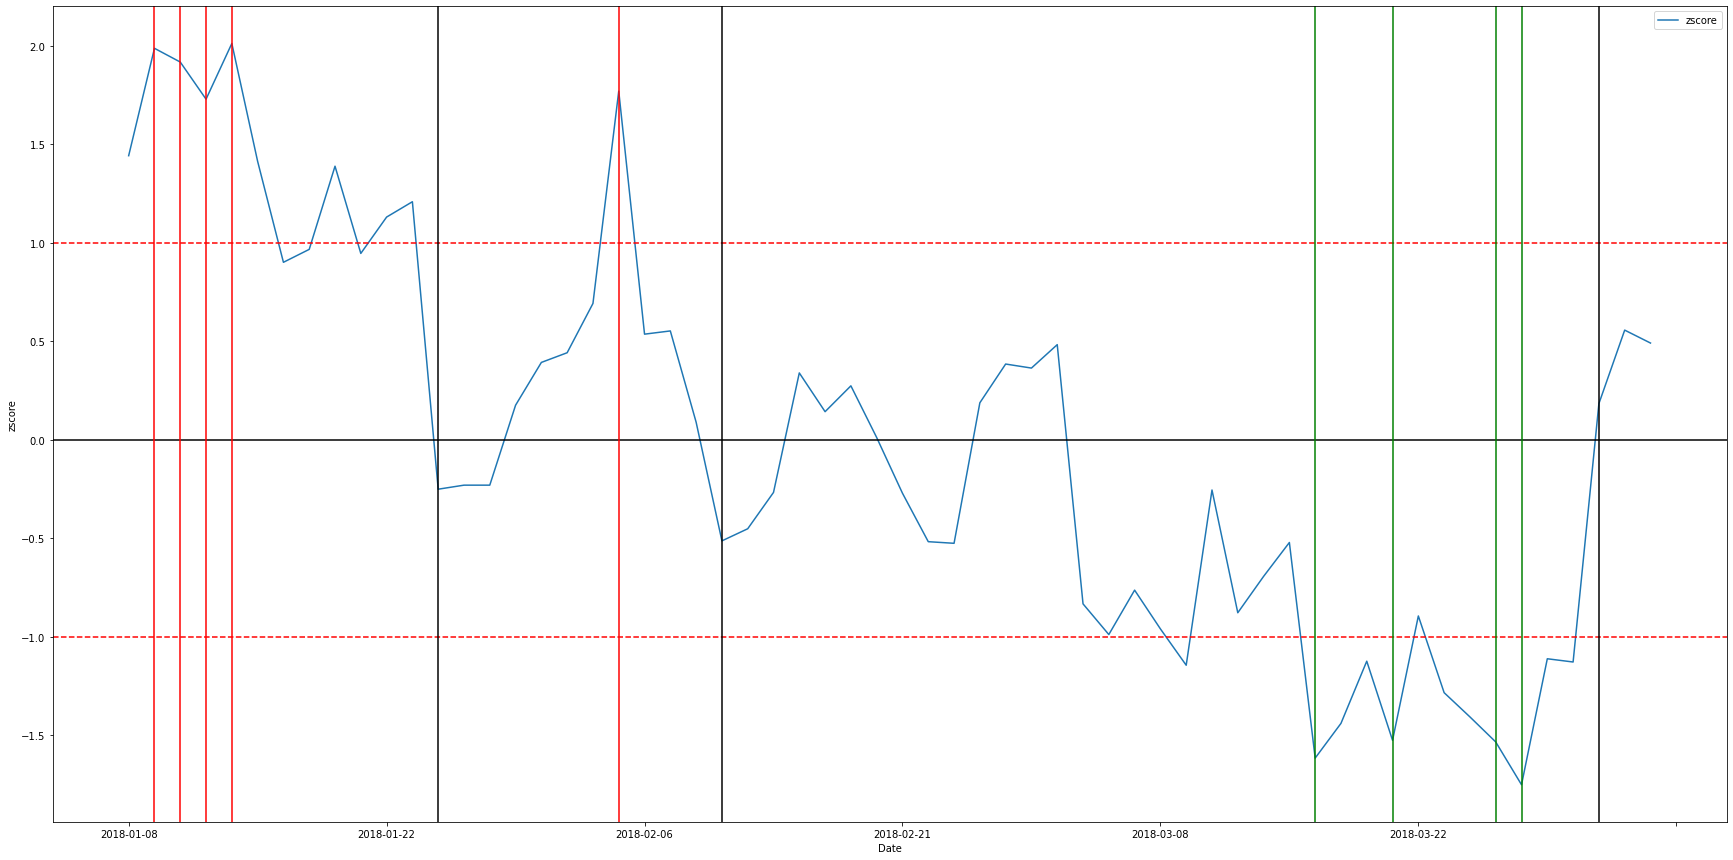

In [4]:
# Plotting the zscore of the Spread
orders_plt = orders_df.plot(x='Date', y='zscore', figsize=(30,15))

# Plotting the lines at mean, 1 and 2 std. dev.
orders_plt.axhline(0, c='black')
orders_plt.axhline(1, c='red', ls = "--")
orders_plt.axhline(-1, c='red', ls = "--")

# Extracting orders
Orders = orders_df['Orders']

# Plot vertical lines where orders are placed
for order in range(len(Orders)):
    
    if Orders[order] != "FLAT":
        
        # GREEN line for a long position
        if Orders[order] == "LONG":
            orders_plt.axvline(x=order, c = "green")
        
        # RED line for a short position
        elif Orders[order] == "SHORT":
            orders_plt.axvline(x=order, c = "red")
        
        # BLACK line for getting out of all positions at that point
        else:
            orders_plt.axvline(x=order, c = "black")

orders_plt.set_ylabel("zscore")

__In the figure above:__
- __Blue line__ - zscore of the Spread
- __Black horizontal line__ at 0 - Mean
- __Red dotted horizontal lines__ - at +1 and -1 standard deviations
- __Green vertical line__ - represents long position taken on that day
- __Red vertical line__ - represents short position taken on that day
- __Black vertical line__ - represents getting out of all open positions till that point


## 2.3. Get the predicitions dataset of TWL

In [5]:
predictions = pd.read_csv("../Models/Pair3/Twl_predicitions.csv")
predictions.head()

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
0,2018-01-08,177.449997,97.123234,86.276492,NaN
1,2018-01-09,174.800003,97.166994,85.608620,NaN
2,2018-01-10,171.399994,97.210755,86.225199,NaN
3,2018-01-11,175.149994,97.254516,85.538993,NaN
4,2018-01-12,174.050003,96.775293,83.449136,NaN


In [6]:
predictions = predictions.dropna()
predictions.head()

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
10,2018-01-22,169.600006,96.558634,83.188589,89.383934
11,2018-01-23,164.750000,96.646155,84.535968,89.366340
12,2018-01-24,168.149994,96.166933,85.429987,89.139870
13,2018-01-25,164.600006,96.210693,86.224266,88.490750
14,2018-01-29,163.550003,96.254454,87.185327,87.542010


## 2.4 Visualize the predictions by different models

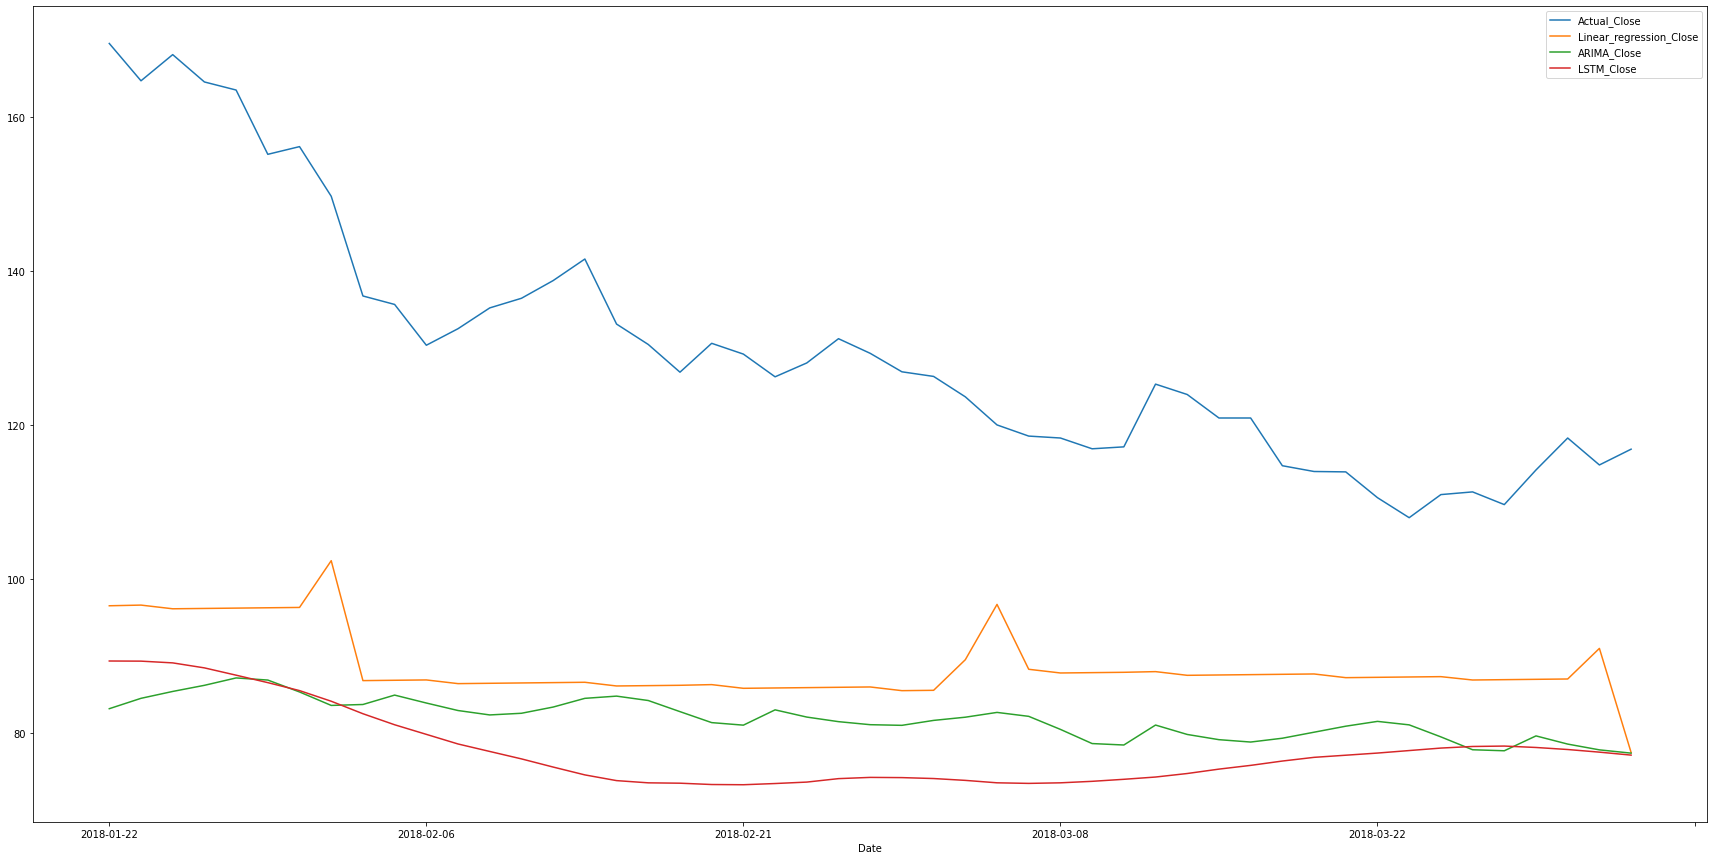

In [7]:
predictions.plot(x='Date', y=['Actual_Close', 'Linear_regression_Close', 'ARIMA_Close', 'LSTM_Close'], figsize=(30,15))

__In the figure above:__
- __x-axis__ - Date
- __y-axis__ - Price in rupees
- __Blue line__ - Actual data in the time period of correlation
- __Orange line__ - Linear Regression predictions for the time period
- __Red line__ - LSTM predictions for the time period
- __Green line__ - ARIMA predictions for the time period


---

# 3. Set parameters of trading

In [8]:
CAPITAL = 1000000
RISK = 20000 # Max risk allowed per trade (2% of capital)

- CAPITAL - Total amout of money willing to be spent.
- RISK - Amount to spend per trade (maximum).
- OPEN POSITION - Buy/Short shares of stock worth 20000.
- CLOSE POSITION - Buy/Sell shares to consolidate open positions and take profit/loss.
- TRADE_BOOK - Keeps track of all open positions.
- For the purpose of this experiment, we assume no brokerage costs, which is a fair assumption as many brokers (such as zerodha, robinhood, sharekhan, etc.) offer equity delivery at no cost.

---

# 4. Evaluate all individual orders

## 4.1. Display all orders which are not *FLAT*

In [9]:
not_flat_orders = orders_df[orders_df['Orders'] != 'FLAT']
not_flat_orders

,Date,TATAMOTORS_Close,TWL_Close,Spread,zscore,Orders
1,2018-01-09,437.549988,174.800003,262.749985,1.987008,SHORT
2,2018-01-10,433.299988,171.399994,261.899994,1.917332,SHORT
3,2018-01-11,434.750000,175.149994,259.600006,1.728797,SHORT
4,2018-01-12,437.100006,174.050003,263.050003,2.011601,SHORT
12,2018-01-24,403.600006,168.149994,235.450012,-0.250834,GET_OUT_OF_POSITION
19,2018-02-05,395.799988,135.699997,260.099991,1.769782,SHORT
23,2018-02-09,368.750000,136.500000,232.250000,-0.513147,GET_OUT_OF_POSITION
46,2018-03-16,339.750000,120.949997,218.800003,-1.615674,LONG
49,2018-03-21,333.850006,113.949997,219.900009,-1.525504,LONG
53,2018-03-27,331.149994,111.349998,219.799995,-1.533702,LONG


In [10]:
not_flat_orders = not_flat_orders.set_index('Date').reset_index()
not_flat_orders

,Date,TATAMOTORS_Close,TWL_Close,Spread,zscore,Orders
0,2018-01-09,437.549988,174.800003,262.749985,1.987008,SHORT
1,2018-01-10,433.299988,171.399994,261.899994,1.917332,SHORT
2,2018-01-11,434.750000,175.149994,259.600006,1.728797,SHORT
3,2018-01-12,437.100006,174.050003,263.050003,2.011601,SHORT
4,2018-01-24,403.600006,168.149994,235.450012,-0.250834,GET_OUT_OF_POSITION
5,2018-02-05,395.799988,135.699997,260.099991,1.769782,SHORT
6,2018-02-09,368.750000,136.500000,232.250000,-0.513147,GET_OUT_OF_POSITION
7,2018-03-16,339.750000,120.949997,218.800003,-1.615674,LONG
8,2018-03-21,333.850006,113.949997,219.900009,-1.525504,LONG
9,2018-03-27,331.149994,111.349998,219.799995,-1.533702,LONG


## 4.2 Flip all orders

In [11]:
def flip_orders(orders):
    
    flipped_orders = []
    
    for order in orders:
        if order == 'SHORT':
            flipped_orders.append('LONG')
        elif order == 'LONG':
            flipped_orders.append('SHORT')
        else:
            flipped_orders.append(order)
    
    return flipped_orders


In [12]:
not_flat_orders['Orders'] = flip_orders(not_flat_orders['Orders'])
not_flat_orders

,Date,TATAMOTORS_Close,TWL_Close,Spread,zscore,Orders
0,2018-01-09,437.549988,174.800003,262.749985,1.987008,LONG
1,2018-01-10,433.299988,171.399994,261.899994,1.917332,LONG
2,2018-01-11,434.750000,175.149994,259.600006,1.728797,LONG
3,2018-01-12,437.100006,174.050003,263.050003,2.011601,LONG
4,2018-01-24,403.600006,168.149994,235.450012,-0.250834,GET_OUT_OF_POSITION
5,2018-02-05,395.799988,135.699997,260.099991,1.769782,LONG
6,2018-02-09,368.750000,136.500000,232.250000,-0.513147,GET_OUT_OF_POSITION
7,2018-03-16,339.750000,120.949997,218.800003,-1.615674,SHORT
8,2018-03-21,333.850006,113.949997,219.900009,-1.525504,SHORT
9,2018-03-27,331.149994,111.349998,219.799995,-1.533702,SHORT


- As TWL is the stock with the lower price value, in pair trading we need to take the position opposite to the one we take on the larger stock. Hence the positions to take are flipped.

## 4.3. Get predictions of dates where orders are placed

### 4.3.1. Filter rows in predictions to only include dates where orders are placed

In [13]:
not_flat_orders = not_flat_orders.set_index('Date')
not_flat_orders

,TATAMOTORS_Close,TWL_Close,Spread,zscore,Orders
Date,,,,,
2018-01-09,437.549988,174.800003,262.749985,1.987008,LONG
2018-01-10,433.299988,171.399994,261.899994,1.917332,LONG
2018-01-11,434.750000,175.149994,259.600006,1.728797,LONG
2018-01-12,437.100006,174.050003,263.050003,2.011601,LONG
2018-01-24,403.600006,168.149994,235.450012,-0.250834,GET_OUT_OF_POSITION
2018-02-05,395.799988,135.699997,260.099991,1.769782,LONG
2018-02-09,368.750000,136.500000,232.250000,-0.513147,GET_OUT_OF_POSITION
2018-03-16,339.750000,120.949997,218.800003,-1.615674,SHORT
2018-03-21,333.850006,113.949997,219.900009,-1.525504,SHORT


In [14]:
predicitions = predictions.set_index('Date')
predicitions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
Date,,,,
2018-01-22,169.600006,96.558634,83.188589,89.383934
2018-01-23,164.750000,96.646155,84.535968,89.366340
2018-01-24,168.149994,96.166933,85.429987,89.139870
2018-01-25,164.600006,96.210693,86.224266,88.490750
2018-01-29,163.550003,96.254454,87.185327,87.542010
2018-01-30,155.199997,96.298215,86.909503,86.574080
2018-01-31,156.199997,96.341975,85.363133,85.539820
2018-02-01,149.750000,102.413973,83.614680,84.158080
2018-02-02,136.800003,86.837087,83.734587,82.535340


In [15]:
orders_predictions = predicitions.join(not_flat_orders)
orders_predictions = orders_predictions.dropna()
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,TATAMOTORS_Close,TWL_Close,Spread,zscore,Orders
Date,,,,,,,,,
2018-01-24,168.149994,96.166933,85.429987,89.139870,403.600006,168.149994,235.450012,-0.250834,GET_OUT_OF_POSITION
2018-02-05,135.699997,86.880848,84.955853,81.101750,395.799988,135.699997,260.099991,1.769782,LONG
2018-02-09,136.500000,86.532907,82.594441,76.669460,368.750000,136.500000,232.250000,-0.513147,GET_OUT_OF_POSITION
2018-03-16,120.949997,87.612193,78.857023,75.826330,339.750000,120.949997,218.800003,-1.615674,SHORT
2018-03-21,113.949997,87.220492,80.916029,77.146614,333.850006,113.949997,219.900009,-1.525504,SHORT
2018-03-27,111.349998,86.916312,77.855677,78.281400,331.149994,111.349998,219.799995,-1.533702,SHORT
2018-03-28,109.699997,86.960072,77.724023,78.334550,326.850006,109.699997,217.150009,-1.750928,SHORT
2018-04-04,114.849998,91.021466,77.842161,77.545080,355.600006,114.849998,240.750008,0.183619,GET_OUT_OF_POSITION


### 4.3.2 Remove columns in orders and predictions dataframe

In [16]:
orders_predictions = orders_predictions.drop(columns=['TATAMOTORS_Close', 'TWL_Close', 'Spread', 'zscore'])
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders
Date,,,,,
2018-01-24,168.149994,96.166933,85.429987,89.139870,GET_OUT_OF_POSITION
2018-02-05,135.699997,86.880848,84.955853,81.101750,LONG
2018-02-09,136.500000,86.532907,82.594441,76.669460,GET_OUT_OF_POSITION
2018-03-16,120.949997,87.612193,78.857023,75.826330,SHORT
2018-03-21,113.949997,87.220492,80.916029,77.146614,SHORT
2018-03-27,111.349998,86.916312,77.855677,78.281400,SHORT
2018-03-28,109.699997,86.960072,77.724023,78.334550,SHORT
2018-04-04,114.849998,91.021466,77.842161,77.545080,GET_OUT_OF_POSITION


### 4.3.3 Create function to evaluate orders

In [17]:
def evaluate_orders(orders_df):
    
    actual_profits = []
    LR_profits = []
    ARIMA_profits = []
    LSTM_profits = []
    shares = []
    
    num_orders = len(orders_df["Orders"])
    
    for i in range(num_orders):
        
        if i == num_orders - 1:
            actual_profits.append(0)
            LR_profits.append(0)
            ARIMA_profits.append(0)
            LSTM_profits.append(0)
            shares.append(0)
            break
        
        position = orders_df['Orders'][i]
        close = orders_df['Actual_Close'][i]
        LR_close = orders_df['Linear_regression_Close'][i]
        ARIMA_close = orders_df['ARIMA_Close'][i]
        LSTM_close = orders_df['LSTM_Close'][i]
        
        print()
        
        print("ORDER: ", i, close, LR_close, ARIMA_close, LSTM_close, position)
        
        if position == 'LONG' or position == 'SHORT':
            
            no_of_shares = 20000//close
            
            for j in range(i+1, num_orders):
                
                if (j == num_orders - 1) or orders_df['Orders'][j] == 'GET_OUT_OF_POSITION':
                    
                    actual_profit = orders_df['Actual_Close'][j] - orders_df['Actual_Close'][i]
                    LR_profit = orders_df['Linear_regression_Close'][j] - orders_df['Linear_regression_Close'][i]
                    ARIMA_profit = orders_df['ARIMA_Close'][j] - orders_df['ARIMA_Close'][i]
                    LSTM_profit = orders_df['LSTM_Close'][j] - orders_df['LSTM_Close'][i]
                    
                    actual_profit *= no_of_shares
                    LR_profit *= no_of_shares
                    ARIMA_profit *= no_of_shares
                    LSTM_profit  *= no_of_shares
                    
                    if position == 'SHORT':
                        actual_profit *= -1
                        LR_profit *= -1
                        ARIMA_profit *= -1
                        LSTM_profit *= -1
                    
                    print('number of shares: ', no_of_shares)
                    print('actual profit: ', actual_profit)
                    print('LR profit: ', LR_profit)
                    print('ARIMA profit: ', ARIMA_profit)
                    print('LSTM profit: ', LSTM_profit)
                    
                    shares.append(no_of_shares)
                    actual_profits.append(actual_profit)
                    LR_profits.append(LR_profit)
                    ARIMA_profits.append(ARIMA_profit)
                    LSTM_profits.append(LSTM_profit)
                    
                    break
        else:
            actual_profits.append(0)
            LR_profits.append(0)
            ARIMA_profits.append(0)
            LSTM_profits.append(0)
            shares.append(0)
        
        print()
    
    return actual_profits, LR_profits, ARIMA_profits, LSTM_profits, shares
                    

In [18]:
actual_profits, LR_profits, ARIMA_profits, LSTM_profits, shares = evaluate_orders(orders_predictions)


ORDER:  0 168.14999389648438 96.16693263198248 85.42998737075932 89.13987 GET_OUT_OF_POSITION


ORDER:  1 135.69999694824222 86.8808480718144 84.955852637819 81.10175 LONG
number of shares:  147.0
actual profit:  117.60044860839426
LR profit:  -51.14729541786073
ARIMA profit:  -347.1274904119012
LSTM profit:  -651.5466299999993


ORDER:  2 136.5 86.53290728665888 82.59444113841832 76.66946 GET_OUT_OF_POSITION


ORDER:  3 120.9499969482422 87.61219319418888 78.85702331881733 75.82633 SHORT
number of shares:  165.0
actual profit:  1006.4997482299829
LR profit:  -562.5300824994291
ARIMA profit:  167.4522753009325
LSTM profit:  -283.59375


ORDER:  4 113.9499969482422 87.22049175215946 80.91602917559233 77.146614 SHORT
number of shares:  175.0
actual profit:  -157.5002670288061
LR profit:  -665.1705671272694
ARIMA profit:  537.926922982069
LSTM profit:  -69.73154999999984


ORDER:  5 111.3499984741211 86.91631162387785 77.85567691922459 78.2814 SHORT
number of shares:  179.0
actual profit

In [19]:
actual_profits

[0,
 117.60044860839426,
 0,
 1006.4997482299829,
 -157.5002670288061,
 -626.5,
 -937.3002777099583,
 0]

In [20]:
LR_profits

[0,
 -51.14729541786073,
 0,
 -562.5300824994291,
 -665.1705671272694,
 -734.8227087668732,
 -739.1737336112102,
 0]

In [21]:
LSTM_profits

[0,
 -651.5466299999993,
 0,
 -283.59375,
 -69.73154999999984,
 131.80128000000113,
 143.68353999999897,
 0]

In [22]:
shares

[0, 147.0, 0, 165.0, 175.0, 179.0, 182.0, 0]

In [23]:
ARIMA_profits

[0,
 -347.1274904119012,
 0,
 167.4522753009325,
 537.926922982069,
 2.4193416175486533,
 -21.501033690669885,
 0]

### 4.3.4 Adding evaluated orders to dataframe

In [24]:
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders
Date,,,,,
2018-01-24,168.149994,96.166933,85.429987,89.139870,GET_OUT_OF_POSITION
2018-02-05,135.699997,86.880848,84.955853,81.101750,LONG
2018-02-09,136.500000,86.532907,82.594441,76.669460,GET_OUT_OF_POSITION
2018-03-16,120.949997,87.612193,78.857023,75.826330,SHORT
2018-03-21,113.949997,87.220492,80.916029,77.146614,SHORT
2018-03-27,111.349998,86.916312,77.855677,78.281400,SHORT
2018-03-28,109.699997,86.960072,77.724023,78.334550,SHORT
2018-04-04,114.849998,91.021466,77.842161,77.545080,GET_OUT_OF_POSITION


In [25]:
orders_predictions['Shares'] = shares
orders_predictions['Actual_profit'] = actual_profits
orders_predictions['Linear_regression_profit'] = LR_profits
orders_predictions['ARIMA_profit'] = ARIMA_profits
orders_predictions['LSTM_profit'] = LSTM_profits

In [26]:
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders,Shares,Actual_profit,Linear_regression_profit,ARIMA_profit,LSTM_profit
Date,,,,,,,,,,
2018-01-24,168.149994,96.166933,85.429987,89.139870,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000
2018-02-05,135.699997,86.880848,84.955853,81.101750,LONG,147.0,117.600449,-51.147295,-347.127490,-651.54663
2018-02-09,136.500000,86.532907,82.594441,76.669460,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000
2018-03-16,120.949997,87.612193,78.857023,75.826330,SHORT,165.0,1006.499748,-562.530082,167.452275,-283.59375
2018-03-21,113.949997,87.220492,80.916029,77.146614,SHORT,175.0,-157.500267,-665.170567,537.926923,-69.73155
2018-03-27,111.349998,86.916312,77.855677,78.281400,SHORT,179.0,-626.500000,-734.822709,2.419342,131.80128
2018-03-28,109.699997,86.960072,77.724023,78.334550,SHORT,182.0,-937.300278,-739.173734,-21.501034,143.68354
2018-04-04,114.849998,91.021466,77.842161,77.545080,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000


### 4.3.5 Visualizing the profits

In [27]:
orders_predictions = orders_predictions.reset_index()

In [28]:
orders_predictions

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders,Shares,Actual_profit,Linear_regression_profit,ARIMA_profit,LSTM_profit
0,2018-01-24,168.149994,96.166933,85.429987,89.139870,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000
1,2018-02-05,135.699997,86.880848,84.955853,81.101750,LONG,147.0,117.600449,-51.147295,-347.127490,-651.54663
2,2018-02-09,136.500000,86.532907,82.594441,76.669460,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000
3,2018-03-16,120.949997,87.612193,78.857023,75.826330,SHORT,165.0,1006.499748,-562.530082,167.452275,-283.59375
4,2018-03-21,113.949997,87.220492,80.916029,77.146614,SHORT,175.0,-157.500267,-665.170567,537.926923,-69.73155
5,2018-03-27,111.349998,86.916312,77.855677,78.281400,SHORT,179.0,-626.500000,-734.822709,2.419342,131.80128
6,2018-03-28,109.699997,86.960072,77.724023,78.334550,SHORT,182.0,-937.300278,-739.173734,-21.501034,143.68354
7,2018-04-04,114.849998,91.021466,77.842161,77.545080,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000


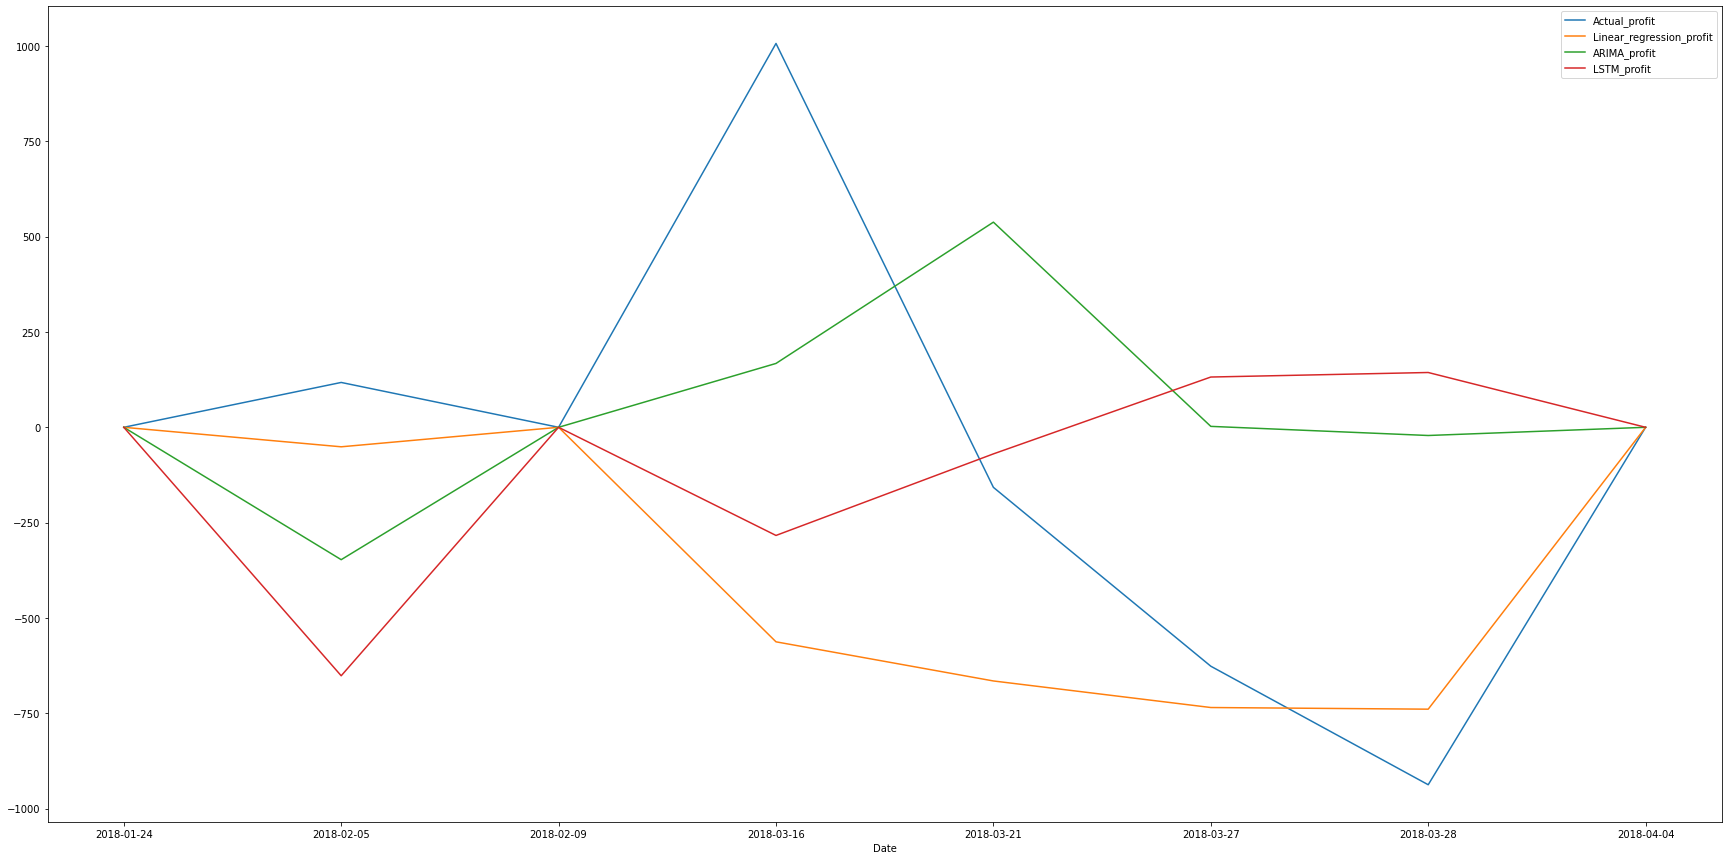

In [29]:
orders_predictions.plot(x='Date', y=['Actual_profit', 'Linear_regression_profit', 'ARIMA_profit', 'LSTM_profit'], figsize=(30,15))

__In the figure above:__
- __x-axis__ - Date
- __y-axis__ - Profit
- __Blue line__ - Actual profit
- __Orange line__ - Linear Regression predicted profit
- __Green line__ - ARIMA predicted profit
- __Red line__ - LSTM predicted profit

---